In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
import collections as col

'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Score is either 1 (for positive) or 0 (for negative)

In [48]:
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t", names=['rev','positive'])
pd.set_option('display.max_colwidth', -1)
df[df.positive==0].head(15)

,rev,positive
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0
12,If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.,0
14,"The design is very odd, as the ear ""clip"" is not very comfortable at all.",0
16,I advise EVERYONE DO NOT BE FOOLED!,0
19,It clicks into place in a way that makes you wonder how long that mechanism would last.,0


# Trying to predict positive reviews

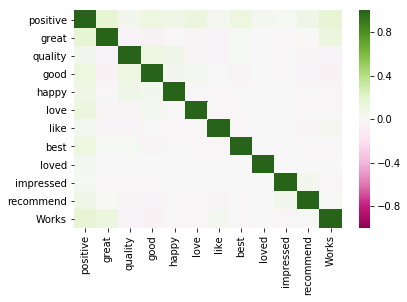

In [49]:
dfp = pd.DataFrame(df)

key_pos = ['great', 'quality', 'good', 'happy', 'love', 'like', 'best', 'loved', 'impressed', 'recommend', 'Works']

for key in key_pos:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfp[str(key)] = dfp.rev.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
sns.heatmap(dfp.corr(), vmin=-1, cmap="PiYG")
plt.show()

dfp['positive'] = (dfp.positive == 1)

In [50]:
inputp = dfp[key_pos]
goalp = dfp['positive']

pos = BernoulliNB()

pos.fit(inputp, goalp)

y_pred = pos.predict(inputp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    inputp.shape[0],
    (goalp != y_pred).sum()
))



Number of mislabeled points out of a total 1000 points : 358


# Trying to predict negative reviews

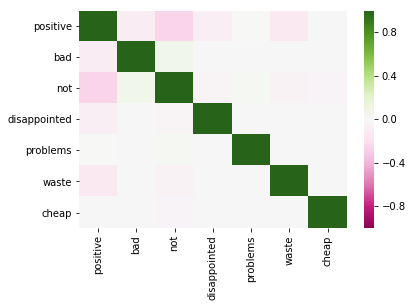

In [52]:
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t", names=['rev','positive'])
dfn = pd.DataFrame(df)

key_neg = ['bad', 'not', 'disappointed', 'problems', 'waste', 'cheap']

for key in key_neg:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfn[str(key)] = dfn.rev.str.contains(
        ' ' + str(key),
        case=False
    )
sns.heatmap(dfn.corr(), vmin=-1, cmap="PiYG")
plt.show()

dfn['positive'] = (dfn.positive == 1)

In [53]:
inputn = dfn[key_neg]
goaln = dfn['positive']

neg = BernoulliNB()

neg.fit(inputn, goaln)

y_pred = neg.predict(inputn)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    inputn.shape[0],
    (goaln != y_pred).sum()
))



Number of mislabeled points out of a total 1000 points : 394


To choose features, I used the below to identify the most common words and experimented with different combinations. 

In [54]:
#list the most common words
col.Counter(" ".join(df["rev"]).split()).most_common(100)

[('the', 414),
 ('and', 307),
 ('I', 303),
 ('is', 238),
 ('a', 207),
 ('to', 195),
 ('it', 176),
 ('this', 143),
 ('my', 130),
 ('of', 117),
 ('for', 114),
 ('phone', 110),
 ('with', 106),
 ('The', 97),
 ('not', 91),
 ('was', 87),
 ('on', 86),
 ('in', 84),
 ('very', 80),
 ('have', 72),
 ('that', 71),
 ('It', 61),
 ('good', 53),
 ('This', 53),
 ('you', 52),
 ('had', 43),
 ('as', 42),
 ('but', 41),
 ('are', 40),
 ('has', 33),
 ('great', 33),
 ('one', 32),
 ('sound', 32),
 ('quality', 32),
 ('from', 32),
 ('your', 32),
 ('so', 32),
 ('it.', 31),
 ('Great', 30),
 ('would', 30),
 ('like', 30),
 ('headset', 29),
 ('phone.', 28),
 ("I've", 28),
 ('works', 28),
 ('than', 27),
 ('battery', 27),
 ('all', 27),
 ('use', 27),
 ('be', 25),
 ('recommend', 24),
 ('product', 24),
 ('-', 24),
 ('or', 23),
 ('at', 23),
 ('work', 23),
 ('get', 22),
 ('really', 22),
 ('up', 21),
 ('when', 20),
 ('out', 20),
 ('product.', 20),
 ('only', 20),
 ("I'm", 20),
 ('am', 20),
 ('no', 19),
 ('me', 19),
 ('ear', 19)

In [55]:
# The positive model appears more accurate. Let's try it on the Yelp dataset.

In [56]:
df2 = pd.read_csv('yelp_labelled.txt',delimiter="\t", names=['rev','positive'])
df2.head()

,rev,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


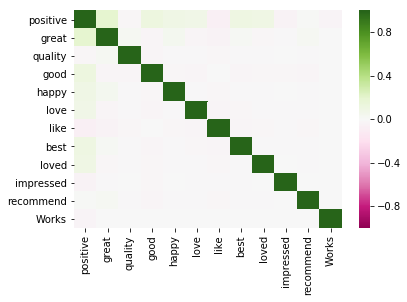

Number of mislabeled points out of a total 1000 points : 397


In [57]:
dfp2 = df2

key_pos = ['great', 'quality', 'good', 'happy', 'love', 'like', 'best', 'loved', 'impressed', 'recommend', 'Works']

for key in key_pos:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfp2[str(key)] = dfp2.rev.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
sns.heatmap(dfp2.corr(), vmin=-1, cmap="PiYG")
plt.show()

dfp2['positive'] = (dfp2.positive == 1)

inputp2 = dfp2[key_pos]
goalp2 = dfp2['positive']

pos2 = BernoulliNB()

pos2.fit(inputp2, goalp2)

y_pred = pos2.predict(inputp2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    inputp2.shape[0],
    (goalp2 != y_pred).sum()
))



Not quite as good, which makes sense given that yelp is not about product reviews but business reviews. overall still a decent success rate.